In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
df=pd.read_csv(r"C:\Users\tessl\Downloads\5e1ce352c93c11ed\dataset\train.csv")

In [ ]:
df1=pd.read_csv(r"C:\Users\tessl\Downloads\5e1ce352c93c11ed\dataset\test.csv")

NameError: ignored

In [ ]:
df


,CustomerID,Age,Gender,City,is_Married,family_size,height,annual_income,job,is_physically_ok,has_taken_car_loan,preferable_fuel_choice,vehicle_choice
0,CusID_00000,36.0,Male,New York City,Divorced,2.0,160.0,32200.0,Service,Yes,Yes,Hybrid,Sedan
1,CusID_00001,15.0,Female,New York City,Single,1.0,143.0,9000.0,Service,Yes,Yes,Petrol,Compact Utility Vehicle
2,CusID_00002,55.0,Male,Paris,Married,2.0,168.0,152400.0,Service,Yes,No,Petrol,Sports Sedan
3,CusID_00003,23.0,Male,Vancouver,Divorced,3.0,165.0,141140.0,Business,Yes,No,Diesel,Sportscar
4,CusID_00004,23.0,Not_Specified,Vancouver,Single,1.0,147.0,38100.0,Service,Yes,Yes,Hybrid,Sports Utility Vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,CusID_29995,24.0,Female,Vienna,Divorced,3.0,155.0,91320.0,Business,Yes,No,Petrol,Sedan
29996,CusID_29996,32.0,Female,Shinjuku,Married,5.0,163.0,133210.0,Business,Yes,No,Diesel,Sports Utility Vehicle
29997,CusID_29997,24.0,Female,San Francisco,Single,1.0,NaN,87300.0,Service,Yes,No,Petrol,Luxury Sedan
29998,CusID_29998,NaN,Female,Vienna,Married,2.0,139.0,94580.0,NaN,Yes,No,Petrol,Sports Utility Vehicle


In [ ]:
df1

,CustomerID,Age,Gender,City,is_Married,family_size,height,annual_income,job,is_physically_ok,has_taken_car_loan,preferable_fuel_choice
0,CusID_30000,32.0,Female,Delhi,Married,6.0,142.0,150800.0,Service,Yes,No,Diesel
1,CusID_30001,22.0,Male,Perth,Divorced,4.0,155.0,167000.0,Service,Yes,No,Petrol
2,CusID_30002,46.0,Female,Barcelona,Married,2.0,NaN,66000.0,Service,Yes,No,Petrol
3,CusID_30003,35.0,NaN,Kuala Lampur,Single,1.0,137.0,71820.0,Business,Yes,NaN,Petrol
4,CusID_30004,48.0,Male,Sydney,Married,3.0,162.0,6500.0,Service,Yes,Yes,Hybrid
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,CusID_34995,31.0,Female,Mumbai,NaN,5.0,145.0,NaN,Service,No,Yes,Petrol
4996,CusID_34996,39.0,Male,NaN,Married,2.0,169.0,52870.0,Business,Yes,Yes,Petrol
4997,CusID_34997,28.0,Male,Berlin,Divorced,4.0,155.0,151500.0,Business,Yes,No,Diesel
4998,CusID_34998,37.0,Male,Vancouver,Married,5.0,153.0,110470.0,Business,Yes,No,Petrol


In [ ]:
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
train_original=df.copy()
test_original=df1.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              30000 non-null  object 
 1   Age                     29561 non-null  float64
 2   Gender                  29583 non-null  object 
 3   City                    29577 non-null  object 
 4   is_Married              29580 non-null  object 
 5   family_size             29586 non-null  float64
 6   height                  29569 non-null  float64
 7   annual_income           29581 non-null  float64
 8   job                     29572 non-null  object 
 9   is_physically_ok        29578 non-null  object 
 10  has_taken_car_loan      29569 non-null  object 
 11  preferable_fuel_choice  29572 non-null  object 
 12  vehicle_choice          30000 non-null  object 
dtypes: float64(4), object(9)
memory usage: 3.0+ MB


In [ ]:
df.shape

(30000, 13)

In [ ]:
df.isna().sum()

CustomerID                  0
Age                       439
Gender                    417
City                      423
is_Married                420
family_size               414
height                    431
annual_income             419
job                       428
is_physically_ok          422
has_taken_car_loan        431
preferable_fuel_choice    428
vehicle_choice              0
dtype: int64

In [ ]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'City', 'is_Married', 'family_size',
       'height', 'annual_income', 'job', 'is_physically_ok',
       'has_taken_car_loan', 'preferable_fuel_choice', 'vehicle_choice'],
      dtype='object')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              5000 non-null   object 
 1   Age                     4933 non-null   float64
 2   Gender                  4919 non-null   object 
 3   City                    4928 non-null   object 
 4   is_Married              4915 non-null   object 
 5   family_size             4927 non-null   float64
 6   height                  4933 non-null   float64
 7   annual_income           4922 non-null   float64
 8   job                     4926 non-null   object 
 9   is_physically_ok        4934 non-null   object 
 10  has_taken_car_loan      4939 non-null   object 
 11  preferable_fuel_choice  4917 non-null   object 
dtypes: float64(4), object(8)
memory usage: 468.9+ KB


In [ ]:
df1.isna().sum()

CustomerID                 0
Age                       67
Gender                    81
City                      72
is_Married                85
family_size               73
height                    67
annual_income             78
job                       74
is_physically_ok          66
has_taken_car_loan        61
preferable_fuel_choice    83
dtype: int64

In [ ]:
df1.is_physically_ok=df1.is_physically_ok.map({"No":0,"Yes":1})
df1.has_taken_car_loan=df1.has_taken_car_loan.map({"No":0,"Yes":1})

In [ ]:
df['vehicle_choice'].value_counts()

Sports Utility Vehicle     3718
Compact Utility Vehicle    3137
Luxury Sedan               2887
Crossover                  2640
Sports Sedan               2317
Utility Vehicle            2309
Sedan                      2210
Hatchback                  1853
Compact Sedan              1629
Pickup-Truck               1566
Luxury Coupe               1097
Sportscar                  1011
Convertible                 949
Station Wagon               911
Coupe                       549
Sports Coupe                549
Utility vehicle             340
Minivan                     328
Name: vehicle_choice, dtype: int64

In [ ]:
df.apply(lambda x: sum(x.isnull()),axis=0)

CustomerID                  0
Age                       439
Gender                    417
City                      423
is_Married                420
family_size               414
height                    431
annual_income             419
job                       428
is_physically_ok          422
has_taken_car_loan        431
preferable_fuel_choice    428
vehicle_choice              0
dtype: int64

In [ ]:
df["preferable_fuel_choice"].value_counts()

Petrol    12180
Diesel    11187
Hybrid     5107
EV         1095
SVY@#         1
IX%K#         1
#%KXJ         1
Name: preferable_fuel_choice, dtype: int64

<AxesSubplot:>

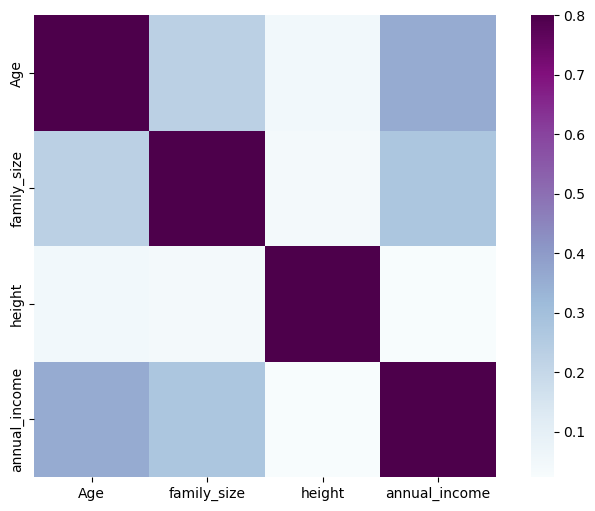

In [ ]:
matrix=df.corr()
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu")

In [ ]:
df["Age"].fillna(df["Age"].mode()[0],inplace=True)
df["City"].fillna(df["City"].mode()[0],inplace=True)
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["is_Married"].fillna(df["is_Married"].mode()[0],inplace=True)
df["family_size"].fillna(df["family_size"].mode()[0],inplace=True)
df["height"].fillna(df["height"].mode()[0],inplace=True)
df["annual_income"].fillna(df["annual_income"].mode()[0],inplace=True)
df["job"].fillna(df["job"].mode()[0],inplace=True)
df["is_physically_ok"].fillna(df["is_physically_ok"].mode()[0],inplace=True)
df["has_taken_car_loan"].fillna(df["has_taken_car_loan"].mode()[0],inplace=True)
df["preferable_fuel_choice"].fillna(df["preferable_fuel_choice"].mode()[0],inplace=True)

In [ ]:
df.isna().sum()

CustomerID                0
Age                       0
Gender                    0
City                      0
is_Married                0
family_size               0
height                    0
annual_income             0
job                       0
is_physically_ok          0
has_taken_car_loan        0
preferable_fuel_choice    0
vehicle_choice            0
dtype: int64

Test value fill missing value

In [ ]:
df1.columns

Index(['CustomerID', 'Age', 'Gender', 'City', 'is_Married', 'family_size',
       'height', 'annual_income', 'job', 'is_physically_ok',
       'has_taken_car_loan', 'preferable_fuel_choice'],
      dtype='object')

In [ ]:
df1.isna().sum()

CustomerID                 0
Age                       67
Gender                    81
City                      72
is_Married                85
family_size               73
height                    67
annual_income             78
job                       74
is_physically_ok          67
has_taken_car_loan        63
preferable_fuel_choice    83
dtype: int64

In [ ]:
df1["Age"].fillna(df["Age"].mode()[0],inplace=True)
df1["City"].fillna(df["City"].mode()[0],inplace=True)
df1["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df1["is_Married"].fillna(df["is_Married"].mode()[0],inplace=True)
df1["family_size"].fillna(df["family_size"].mode()[0],inplace=True)
df1["height"].fillna(df["height"].mode()[0],inplace=True)
df1["annual_income"].fillna(df["annual_income"].mode()[0],inplace=True)
df1["job"].fillna(df["job"].mode()[0],inplace=True)
df1["is_physically_ok"].fillna(df["is_physically_ok"].mode()[0],inplace=True)
df1["has_taken_car_loan"].fillna(df["has_taken_car_loan"].mode()[0],inplace=True)
df1["preferable_fuel_choice"].fillna(df["preferable_fuel_choice"].mode()[0],inplace=True)

In [ ]:
df1.isna().sum()

CustomerID                0
Age                       0
Gender                    0
City                      0
is_Married                0
family_size               0
height                    0
annual_income             0
job                       0
is_physically_ok          0
has_taken_car_loan        0
preferable_fuel_choice    0
dtype: int64

In [ ]:
df['Age'].value_counts()

31.0    1740
27.0    1276
22.0    1266
33.0    1253
23.0    1237
20.0    1232
32.0    1228
28.0    1220
35.0    1217
34.0    1214
30.0    1211
24.0    1207
26.0    1182
21.0    1171
29.0    1166
25.0    1151
38.0     768
37.0     730
36.0     723
39.0     718
15.0     513
17.0     510
19.0     498
18.0     479
16.0     439
45.0     307
49.0     281
40.0     273
41.0     270
48.0     267
46.0     267
50.0     264
42.0     261
43.0     257
44.0     255
47.0     253
54.0     181
55.0     178
57.0     176
51.0     174
52.0     172
60.0     170
59.0     166
56.0     166
53.0     163
58.0     150
Name: Age, dtype: int64

In [ ]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'City', 'is_Married', 'family_size',
       'height', 'annual_income', 'job', 'is_physically_ok',
       'has_taken_car_loan', 'preferable_fuel_choice', 'vehicle_choice'],
      dtype='object')

In [ ]:
df1.columns

Index(['CustomerID', 'Age', 'Gender', 'City', 'is_Married', 'family_size',
       'height', 'annual_income', 'job', 'is_physically_ok',
       'has_taken_car_loan', 'preferable_fuel_choice'],
      dtype='object')

In [ ]:
df=df.drop(["CustomerID","City","height","Gender","job","is_Married","has_taken_car_loan","preferable_fuel_choice","is_physically_ok"],axis=1)
df

,Age,family_size,annual_income,vehicle_choice
0,36.0,2.0,32200.0,Sedan
1,15.0,1.0,9000.0,Compact Utility Vehicle
2,55.0,2.0,152400.0,Sports Sedan
3,23.0,3.0,141140.0,Sportscar
4,23.0,1.0,38100.0,Sports Utility Vehicle
...,...,...,...,...
29995,24.0,3.0,91320.0,Sedan
29996,32.0,5.0,133210.0,Sports Utility Vehicle
29997,24.0,1.0,87300.0,Luxury Sedan
29998,31.0,2.0,94580.0,Sports Utility Vehicle


In [ ]:
df1=df1.drop(["CustomerID","City","height","Gender","is_Married","job","has_taken_car_loan","preferable_fuel_choice","is_physically_ok"],axis=1)
df1

,Age,family_size,annual_income
0,32.0,6.0,150800.0
1,22.0,4.0,167000.0
2,46.0,2.0,66000.0
3,35.0,1.0,71820.0
4,48.0,3.0,6500.0
...,...,...,...
4995,31.0,5.0,5700.0
4996,39.0,2.0,52870.0
4997,28.0,4.0,151500.0
4998,37.0,5.0,110470.0


In [ ]:
x=df.drop("vehicle_choice",1)
y=df.vehicle_choice

C:\Users\tessl\AppData\Local\Temp\ipykernel_1048\271864012.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=df.drop("vehicle_choice",1)


In [ ]:
x=pd.get_dummies(x)
df=pd.get_dummies(df)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=102)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100)
forest.fit(x_train,y_train)

#PRINT THE PREDICTION OF THE RANDOM FOREST CLASSIFIER
pred_rf=forest.predict(x_test)
acc_rf=accuracy_score(y_test,pred_rf)*100
acc_rf

27.62222222222222

In [ ]:
pred_test=forest.predict(df1)

In [ ]:
vehicle_choicecsv=pd.DataFrame({"CustomerID":test_original["CustomerID"],"vehicle_choice":pred_test})
vehicle_choicecsv.set_index("CustomerID", inplace=True)

In [ ]:
vehicle_choicecsv

,vehicle_choice
CustomerID,
CusID_30000,Luxury Sedan
CusID_30001,Luxury Sedan
CusID_30002,Pickup-Truck
CusID_30003,Sports Utility Vehicle
CusID_30004,Compact Sedan
...,...
CusID_34995,Station Wagon
CusID_34996,Crossover
CusID_34997,Pickup-Truck


**One-Hot Encoding**